**Dataset Initialization and Preparation**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import seaborn as sns
import matplotlib.gridspec as gridspec

In [3]:
RANDOM_STATE = 55

In [4]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# plt.figure(figsize=(12,31*4))
# gs = gridspec.GridSpec(31,1)
# for i, col in enumerate(df.columns):
#     ax = plt.subplot(gs[i])
#     sns.histplot(df[col][df['Class']==0],color='g',label='Genuine Class', kde=True, ax=ax)
#     sns.histplot(df[col][df['Class']==1],color='r',label='Fraud Class', kde=True, ax=ax)
#     ax.legend()
#     ax.set_title(f'Distribution of {col}')
# plt.show()

In [11]:
#Selecting features that add value in calculating gaussian distribution based on Feature Importance score and plotting the feature score  
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = RANDOM_STATE, verbose=1)
model_rf.fit(df.iloc[:,1:29], df.iloc[:,30]);
feature_imp = model_rf.feature_importances_

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.1min


In [12]:
feature_imp

array([0.00993135, 0.01151423, 0.03094147, 0.05859777, 0.01111938,
       0.01184509, 0.02349397, 0.01134673, 0.01835727, 0.12512437,
       0.04353889, 0.11843144, 0.00926438, 0.16374813, 0.00902838,
       0.09483194, 0.12955986, 0.01846311, 0.0126338 , 0.01136201,
       0.01416469, 0.00793817, 0.00682334, 0.00768428, 0.00701942,
       0.01320974, 0.00989504, 0.0101317 ])

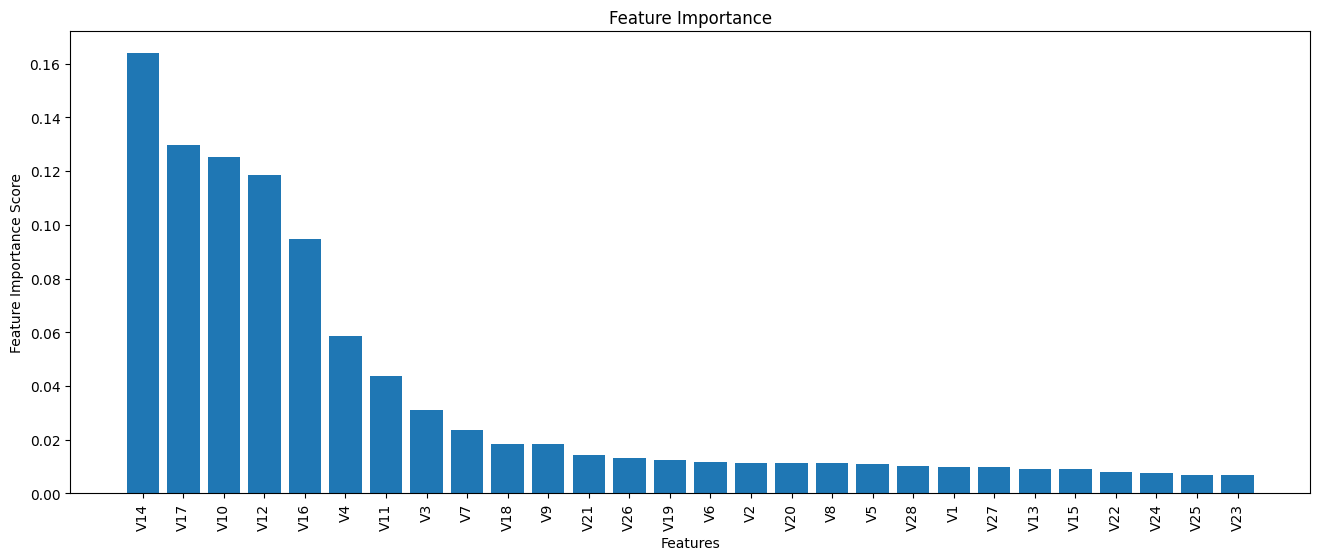

In [13]:
y, x = [list(x) for x in zip(*sorted(zip(feature_imp, df.iloc[:,1:29].columns), reverse = True))]
plt.figure(figsize=(16,6))
plt.bar(range(len(feature_imp)), y, align='center')
plt.xticks(range(len(feature_imp)), x, rotation='vertical')
plt.title('Feature Importance')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.show()

In [14]:
unimportant_features=[i for i,j in zip(x,y) if j<0.020] #features below threshold value -> ['V19','V8','V21','V26','V20','V1','V27','V2','V6','V28','V15','V5','V13','V22','V25','V23','V24']
df.drop(unimportant_features, axis=1, inplace=True)
df.drop(labels = ["Amount", "Time"], axis=1, inplace = True)
df

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0
...,...,...,...,...,...,...,...,...,...,...
284802,-9.834783,-2.066656,-4.918215,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0
284803,2.035030,-0.738589,0.024330,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,0
284804,-3.249640,-0.557828,-0.296827,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0
284805,0.702510,0.689799,-0.686180,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,0


In [15]:
features = df.columns.drop('Class')
features

Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')

In [16]:
gen_trans = df[df['Class'] == 0]
fr_trans =df[df['Class'] == 1]

print("Genuine:\n", gen_trans.head())
print("Fraud:\n", fr_trans.head())

Genuine:
          V3        V4        V7       V10       V11       V12       V14  \
0  2.536347  1.378155  0.239599  0.090794 -0.551600 -0.617801 -0.311169   
1  0.166480  0.448154 -0.078803 -0.166974  1.612727  1.065235 -0.143772   
2  1.773209  0.379780  0.791461  0.207643  0.624501  0.066084 -0.165946   
3  1.792993 -0.863291  0.237609 -0.054952 -0.226487  0.178228 -0.287924   
4  1.548718  0.403034  0.592941  0.753074 -0.822843  0.538196 -1.119670   

        V16       V17  Class  
0 -0.470401  0.207971      0  
1  0.463917 -0.114805      0  
2 -2.890083  1.109969      0  
3 -1.059647 -0.684093      0  
4 -0.451449 -0.237033      0  
Fraud:
             V3        V4        V7       V10       V11        V12       V14  \
541  -1.609851  3.997906 -2.537387 -2.772272  3.202033  -2.899907 -4.289254   
623   1.088463  2.288644  0.325574 -0.838587 -0.414575  -0.503141 -1.692029   
4920 -0.359745  2.330243  0.562320 -1.525412  2.032912  -6.560124 -1.470102   
6108 -2.592844  2.679787 -3.4

In [17]:
scaler = StandardScaler()

In [18]:
gen_train, gen_vt = train_test_split(gen_trans, train_size=0.7, random_state=RANDOM_STATE)

In [19]:
# gen_train_scaled = scaler.fit_transform(gen_train[features])
# gen_vt_scaled = scaler.transform(gen_vt[features])
# gen_train_scaled

In [20]:
# X_train = gen_train_scaled
X_train = gen_train[features]
X_train.shape

(199020, 9)

In [21]:
# gen_val, gen_test = train_test_split(gen_vt_scaled, test_size=0.5, random_state=RANDOM_STATE)
gen_val, gen_test = train_test_split(gen_vt[features], test_size=0.5, random_state=RANDOM_STATE)

print("Genuine Val: ",gen_val.shape)
print("Genuine Test: ",gen_test.shape)

Genuine Val:  (42647, 9)
Genuine Test:  (42648, 9)


In [22]:
fr_val, fr_test =  train_test_split(fr_trans[features], test_size=0.5, random_state=RANDOM_STATE)
print("Fraud Val: ",fr_val.shape)
print("Fraud Test: ",fr_test.shape)

Fraud Val:  (246, 9)
Fraud Test:  (246, 9)


In [23]:
# fr_val_scaled = scaler.transform(fr_val[features])
# fr_test_scaled = scaler.transform(fr_test[features])

In [24]:
# X_val = np.concatenate([gen_val, fr_val_scaled])
# y_val = np.concatenate([np.zeros(len(gen_val)), np.ones(len(fr_val_scaled))])

# X_test = np.concatenate([gen_test, fr_test_scaled])
# y_test = np.concatenate([np.zeros(len(gen_test)), np.ones(len(fr_test_scaled))])

X_val = np.concatenate([gen_val, fr_val])
y_val = np.concatenate([np.zeros(len(gen_val)), np.ones(len(fr_val))])

X_test = np.concatenate([gen_test, fr_test])
y_test = np.concatenate([np.zeros(len(gen_test)), np.ones(len(fr_test))])

**Visualization**

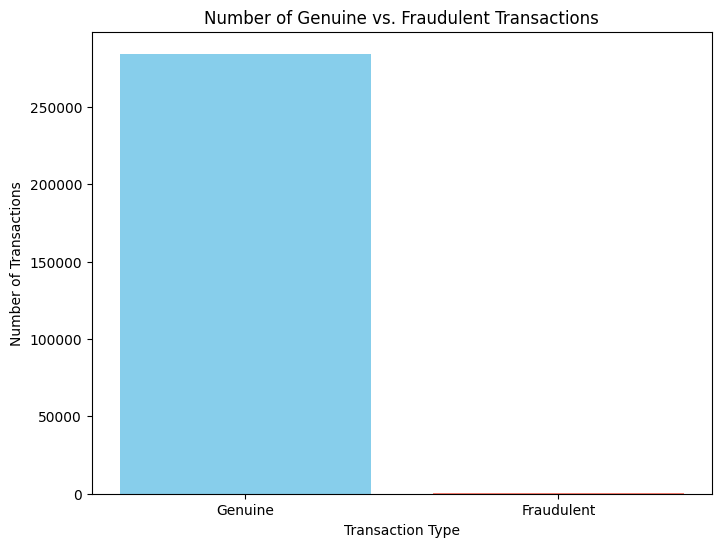

In [25]:
cats = ['Genuine', 'Fraudulent']
vals = [len(gen_trans), len(fr_trans)]

plt.figure(figsize = (8,6))
plt.bar(cats, vals, color=['skyblue', 'salmon'])

# Add titles and labels
plt.title('Number of Genuine vs. Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')

# Show the plot
plt.show()

In [26]:
# plt.figure(figsize=(12, 6))
# plt.scatter(gen_trans['Time']/3600, gen_trans['Amount'], alpha=0.5, label='Genuine', color='skyblue')
# plt.scatter(fr_trans['Time']/3600, fr_trans['Amount'], alpha=0.5, label='Fraudulent', color='salmon')
# plt.title('Transaction Amount vs. Time')
# plt.xlabel('Time (Hours)')
# plt.ylabel('Transaction Amount')
# plt.legend()
# plt.show()

In [27]:
# def estimate_meanvar(X_train):
#     m, n = X_train.shape
#     means = np.mean(X_train, axis=0)
#     variances = np.var(X_train, axis=0)
#     return means, variances

In [28]:
# def eqn(x, mean, var):
#     sd = np.sqrt(var)
#     eq = (1/ (np.sqrt(2*np.pi) * sd)) * (np.exp(-np.square(x-mean)/(2*var)))
#     return eq

# def eqn(x, mean, var):
#     sd = np.sqrt(var)
#     return norm.pdf(x, mean, sd)

In [29]:
# def estimate_gaussian(X_train, means, variances):
#     m, n = X_train.shape
#     pros = np.prod(eqn(X_train, means, variances), axis=1)
#     return pros
            

In [30]:
# means, variances = estimate_meanvar(X_train)
# pros_train = estimate_gaussian(X_train, means, variances)
# print(pros_train[:5])

In [31]:
from scipy.stats import multivariate_normal

mu = np.mean(X_train, axis=0)
sigma  = np.cov(X_train.T)
mu

V3     0.015002
V4    -0.009196
V7     0.008345
V10    0.009024
V11   -0.007338
V12    0.010012
V14    0.012683
V16    0.006495
V17    0.011088
dtype: float64

In [32]:
def multivariateGaussian(X, mu, sigma):
    p = multivariate_normal(mean = mu, cov = sigma)
    return p.pdf(X)

p_train = multivariateGaussian(X_train, mu, sigma)
p_val = multivariateGaussian(X_val, mu, sigma)
p_test = multivariateGaussian(X_test, mu, sigma)
p_val


array([1.26093597e-05, 1.72103913e-06, 3.88150646e-05, ...,
       0.00000000e+00, 7.10598682e-91, 1.55879748e-11])

In [33]:
# plt.figure(figsize=(10,6))
# plt.hist(pros_train, bins=50, color='skyblue', edgecolor='black')
# plt.title('Histogram of Training Probabilities')
# plt.xlabel('Probability')
# plt.ylabel('Frequency')
# plt.plot()
    

In [34]:
# # Scatter plot of probabilities
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(pros_train)), pros_train, alpha=0.5, color='skyblue')
# plt.title('Scatter Plot of Training Probabilities')
# plt.xlabel('Sample Index')
# plt.ylabel('Probability')
# plt.show()

In [35]:
# threshold = 0.05e-19  # Example threshold
# outliers = pros_train < threshold

# # Plot identified outliers
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(pros_train)), pros_train, alpha=0.5, color='skyblue', label='Normal')
# plt.scatter(np.where(outliers)[0], pros_train[outliers], color='red', label='Outliers')
# plt.title('Scatter Plot of Training Probabilities with Outliers')
# plt.xlabel('Sample Index')
# plt.ylabel('Probability')
# plt.legend()
# plt.show()


In [36]:
def select_threshold(y_val, p_val):
    best_eps = 0
    best_F1 =0
    step_size = (np.max(p_val) - np.min(p_val))/1000
    n = len(y_val)

    for eps in np.arange(min(p_val),1.05828e-41,0.0000000000000000000000000000000000105828e-10):
        y_pred = p_val<eps
        F1 = f1_score(y_val, y_pred)
        if F1>best_F1:
            best_F1 = F1
            best_eps = eps
            y_pred_best = y_pred

    return best_eps, best_F1, y_pred_best
        
    
        

In [37]:
# p_val = estimate_gaussian(X_val, means, variances)
# y_pred = select_threshold(y_val_arr, p_val)
# np.unique(y_pred, return_counts = True)

best_eps, best_F1, y_pred_best = select_threshold(y_val, p_val)
print("Selected Epsilon: ", best_eps, "with F1 score: ", best_F1)
# np.unique(y_pred_best, return_counts = True)

Selected Epsilon:  1.05828e-45 with F1 score:  0.7735470941883767


In [38]:
# 

np.unique(y_val, return_counts = True)
np.unique(y_pred_best, return_counts=True)
haha = (y_val==1) & (y_pred_best==1)
np.unique(haha, return_counts=True)

(array([False,  True]), array([42700,   193]))

In [39]:
preds_val = (p_val < best_eps)
np.unique(preds_val, return_counts=True)
F1_val = f1_score(y_val, preds_val)
F1_val

0.7735470941883767

In [40]:
preds_test = (p_test < best_eps)
np.unique(preds_test, return_counts=True)
F1_test = f1_score(y_test, preds_test)
F1_test

0.7983706720977598

In [41]:
# for feature in features:
#     plt.figure(figsize=(6, 4))
#     plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {feature}')
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')
#     plt.show()
# # Q-Q Plots
# from scipy.stats import probplot

# for feature in features:
#     plt.figure(figsize=(6, 4))
#     probplot(df[feature], dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot of {feature}')
#     plt.show()